In [1]:
import pandas as pd
import numpy as np

-----

# The Data

CIFAR-10 is a dataset of 50,000 32x32 color training images, labeled over 10 categories, and 10,000 test images.

In [2]:
from tensorflow.keras.datasets import cifar10

(x_train, y_train), (x_test, y_test) = cifar10.load_data()

A local file was found, but it seems to be incomplete or outdated because the auto file hash does not match the original value of 6d958be074577803d12ecdefd02955f39262c83c16fe9348329d7fe0b5c001ce so we will re-download the data.
170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 922s 5us/step


In [3]:
x_train.shape

(50000, 32, 32, 3)

In [4]:
x_train[0].shape

(32, 32, 3)

In [5]:
import matplotlib.pyplot as plt

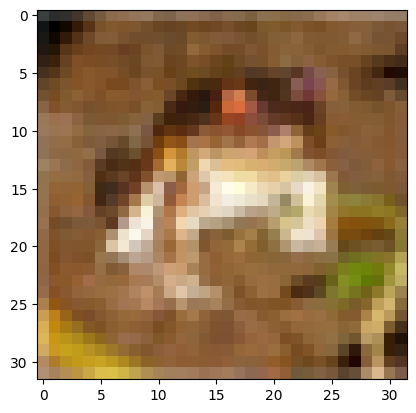

In [6]:
# FROG
plt.imshow(x_train[0])

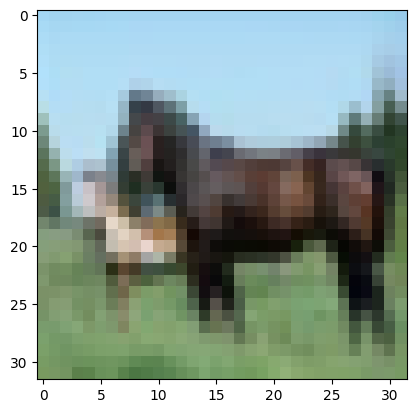

In [7]:
# HORSE
plt.imshow(x_train[12])

# PreProcessing

In [8]:
x_train[0]

array([[[ 59,  62,  63],
        [ 43,  46,  45],
        [ 50,  48,  43],
        ...,
        [158, 132, 108],
        [152, 125, 102],
        [148, 124, 103]],

       [[ 16,  20,  20],
        [  0,   0,   0],
        [ 18,   8,   0],
        ...,
        [123,  88,  55],
        [119,  83,  50],
        [122,  87,  57]],

       [[ 25,  24,  21],
        [ 16,   7,   0],
        [ 49,  27,   8],
        ...,
        [118,  84,  50],
        [120,  84,  50],
        [109,  73,  42]],

       ...,

       [[208, 170,  96],
        [201, 153,  34],
        [198, 161,  26],
        ...,
        [160, 133,  70],
        [ 56,  31,   7],
        [ 53,  34,  20]],

       [[180, 139,  96],
        [173, 123,  42],
        [186, 144,  30],
        ...,
        [184, 148,  94],
        [ 97,  62,  34],
        [ 83,  53,  34]],

       [[177, 144, 116],
        [168, 129,  94],
        [179, 142,  87],
        ...,
        [216, 184, 140],
        [151, 118,  84],
        [123,  92,  72]]

In [9]:
x_train[0].shape

(32, 32, 3)

In [10]:
x_train.max()

255

In [11]:
x_train = x_train/255

In [12]:
x_test = x_test/255

In [13]:
x_train.shape

(50000, 32, 32, 3)

In [14]:
x_test.shape

(10000, 32, 32, 3)

In [15]:
x_train[0].min()

0.0

## Labels

In [16]:
from tensorflow.keras.utils import to_categorical

In [17]:
y_train.shape

(50000, 1)

In [18]:
y_train[0]

array([6], dtype=uint8)

In [19]:
y_cat_train = to_categorical(y_train,10)

In [20]:
y_cat_train.shape

(50000, 10)

In [21]:
y_cat_train[0]

array([0., 0., 0., 0., 0., 0., 1., 0., 0., 0.])

In [22]:
y_cat_test = to_categorical(y_test,10)

----------
# Building the Model

In [23]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D, Flatten

In [24]:
model = Sequential()

## FIRST SET OF LAYERS

# CONVOLUTIONAL LAYER
model.add(Conv2D(filters=64, kernel_size=(4,4),input_shape=(32, 32, 3), activation='relu',))
# POOLING LAYER
model.add(MaxPool2D(pool_size=(2, 2)))

## SECOND SET OF LAYERS

# CONVOLUTIONAL LAYER
model.add(Conv2D(filters=64, kernel_size=(4,4),input_shape=(32, 32, 3), activation='relu',))
# POOLING LAYER
model.add(MaxPool2D(pool_size=(2, 2)))

# FLATTEN IMAGES FROM 28 by 28 to 764 BEFORE FINAL LAYER
model.add(Flatten())

# 256 NEURONS IN DENSE HIDDEN LAYER (YOU CAN CHANGE THIS NUMBER OF NEURONS)
model.add(Dense(256, activation='relu'))
model.add(Dense(256, activation='relu'))
model.add(Dense(256, activation='relu'))

# LAST LAYER IS THE CLASSIFIER, THUS 10 POSSIBLE CLASSES
model.add(Dense(10, activation='softmax'))


model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

C:\Users\Sumit\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


In [25]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 29, 29, 64)          │           3,136 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 14, 14, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 11, 11, 64)          │          65,600 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 5, 5, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 1600)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 256)                 │         409,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 256)                 │          65,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 256)                 │          65,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 10)                  │           2,570 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 612,746 (2.34 MB)

 Trainable params: 612,746 (2.34 MB)

 Non-trainable params: 0 (0.00 B)

In [26]:
from tensorflow.keras.callbacks import EarlyStopping

In [27]:
early_stop = EarlyStopping(monitor='val_loss',patience=5)

In [28]:
model.fit(x_train,y_cat_train,epochs=15,validation_data=(x_test,y_cat_test),callbacks=[early_stop])

Epoch 1/15
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 58s 34ms/step - accuracy: 0.3453 - loss: 1.7471 - val_accuracy: 0.5281 - val_loss: 1.3119
Epoch 2/15
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 51s 33ms/step - accuracy: 0.5728 - loss: 1.2038 - val_accuracy: 0.6071 - val_loss: 1.1029
Epoch 3/15
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 52s 33ms/step - accuracy: 0.6518 - loss: 0.9932 - val_accuracy: 0.6412 - val_loss: 1.0322
Epoch 4/15
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 49s 31ms/step - accuracy: 0.6978 - loss: 0.8569 - val_accuracy: 0.6703 - val_loss: 0.9402
Epoch 5/15
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 49s 31ms/step - accuracy: 0.7367 - loss: 0.7505 - val_accuracy: 0.6877 - val_loss: 0.9215
Epoch 6/15
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 55s 35ms/step - accuracy: 0.7658 - loss: 0.6621 - val_accuracy: 0.6802 - val_loss: 0.9471
Epoch 7/15
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 49s 31ms/step - accuracy: 0.7953 - loss: 0.5845 - val_accuracy: 0.6809 - val_loss: 0.9653
Epoch 8/15
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 50s 32ms/step - accuracy: 0.8183 -

In [29]:
# Careful, don't overwrite our file!
# model.save('cifar_10epochs.h5')

In [30]:
losses = pd.DataFrame(model.history.history)

In [31]:
losses.head()

,accuracy,loss,val_accuracy,val_loss
0,0.43804,1.522657,0.5281,1.311881
1,0.58824,1.165064,0.6071,1.102928
2,0.65382,0.986065,0.6412,1.032187
3,0.69472,0.870511,0.6703,0.940243
4,0.73140,0.765687,0.6877,0.921501


<Axes: >

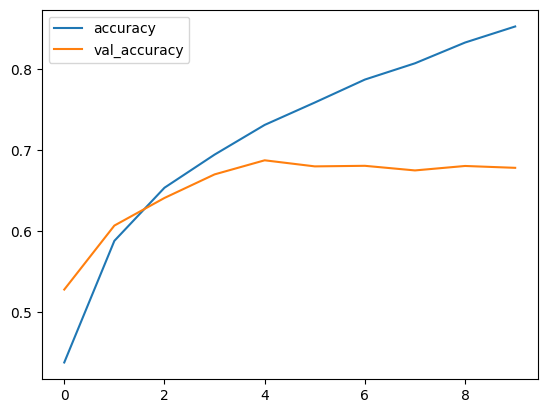

In [32]:
losses[['accuracy','val_accuracy']].plot()

<Axes: >

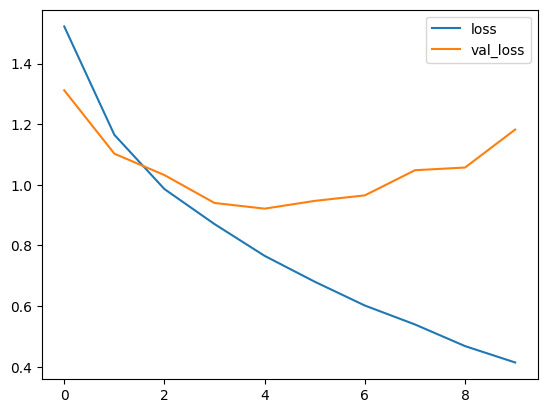

In [33]:
losses[['loss','val_loss']].plot()

In [34]:
model.metrics_names

['loss', 'compile_metrics']

In [35]:
print(model.metrics_names)
print(model.evaluate(x_test,y_cat_test,verbose=0))

['loss', 'compile_metrics']
[1.1824946403503418, 0.6783999800682068]


In [36]:
from sklearn.metrics import classification_report,confusion_matrix

predictions = np.argmax(model.predict(x_test),axis=1)

313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step


In [37]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.62      0.82      0.70      1000
           1       0.79      0.81      0.80      1000
           2       0.64      0.49      0.55      1000
           3       0.50      0.46      0.48      1000
           4       0.67      0.58      0.62      1000
           5       0.52      0.66      0.58      1000
           6       0.75      0.77      0.76      1000
           7       0.79      0.66      0.72      1000
           8       0.79      0.79      0.79      1000
           9       0.78      0.75      0.76      1000

    accuracy                           0.68     10000
   macro avg       0.68      0.68      0.68     10000
weighted avg       0.68      0.68      0.68     10000



In [38]:
confusion_matrix(y_test,predictions)

array([[818,  22,  18,  17,  17,  12,   3,   7,  55,  31],
       [ 49, 809,   4,  11,   0,   7,  16,   3,  34,  67],
       [132,   8, 486,  76,  78, 116,  57,  20,  15,  12],
       [ 52,  14,  57, 456,  54, 219,  77,  26,  22,  23],
       [ 51,   7,  66,  72, 584,  73,  52,  66,  16,  13],
       [ 27,  11,  33, 143,  42, 659,  23,  31,  17,  14],
       [ 13,   7,  51,  47,  35,  49, 774,   7,  12,   5],
       [ 44,   5,  20,  59,  55, 112,  11, 661,   9,  24],
       [ 90,  45,  14,  10,   3,  11,   8,   5, 786,  28],
       [ 54, 100,   7,  18,   3,  17,  13,   6,  31, 751]], dtype=int64)

<Axes: >

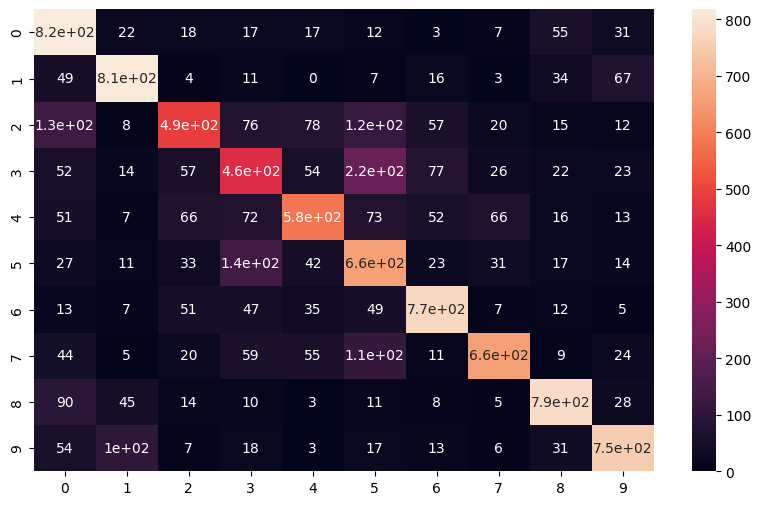

In [39]:
import seaborn as sns
plt.figure(figsize=(10,6))
sns.heatmap(confusion_matrix(y_test,predictions),annot=True)
# https://github.com/matplotlib/matplotlib/issues/14751

# Predicting a given image

In [40]:
my_image = x_test[1]

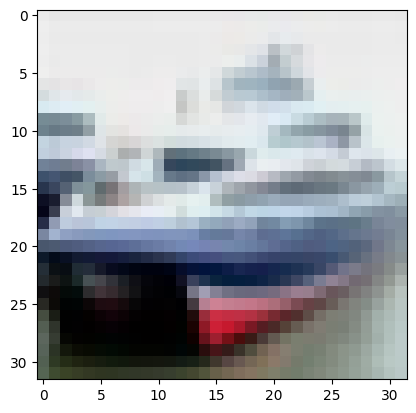

In [41]:
plt.imshow(my_image)

In [42]:
y_test[1]

array([8], dtype=uint8)

In [43]:
# SHAPE --> (num_images,width,height,color_channels)
np.argmax(model.predict(my_image.reshape(1,32,32,3)),axis=1)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step


array([8], dtype=int64)

In [44]:
# # 5 is DOG
# # https://www.cs.toronto.edu/~kriz/cifar.html

# 0 airplane										
# 1 automobile										
# 2 bird										
# 3 cat										
# 4 deer										
# 5 dog										
# 6 frog										
# 7 horse										
# 8 ship										
# 9 truck

In [45]:
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.models import Model

def modified_alexnet(input_shape, num_classes):
    inputs = Input(shape=input_shape)
    
    # Block 1
    x = Conv2D(48, kernel_size=(3, 3), strides=(1, 1), padding='same', activation='relu')(inputs)
    x = MaxPooling2D(pool_size=(2, 2), strides=(2, 2))(x)

    # Block 2
    x = Conv2D(96, kernel_size=(3, 3), strides=(1, 1), padding='same', activation='relu')(x)
    x = MaxPooling2D(pool_size=(2, 2), strides=(2, 2))(x)

    # Block 3
    x = Conv2D(192, kernel_size=(3, 3), strides=(1, 1), padding='same', activation='relu')(x)
    
    # Block 4
    x = Conv2D(192, kernel_size=(3, 3), strides=(1, 1), padding='same', activation='relu')(x)
    
    # Block 5
    x = Conv2D(128, kernel_size=(3, 3), strides=(1, 1), padding='same', activation='relu')(x)
    x = MaxPooling2D(pool_size=(2, 2), strides=(2, 2))(x)

    # Flatten and fully connected layers
    x = Flatten()(x)
    x = Dense(512, activation='relu')(x)
    x = Dropout(0.5)(x)
    x = Dense(256, activation='relu')(x)
    x = Dropout(0.5)(x)
    outputs = Dense(num_classes, activation='softmax')(x)

    model = Model(inputs=inputs, outputs=outputs)
    return model

# Define input shape
input_shape = (32, 32, 3)
num_classes = 10  # CIFAR-10 has 10 classes

# Create the model
model = modified_alexnet(input_shape, num_classes)

# Compile the model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Print the model summary
model.summary()
from tensorflow.keras.callbacks import EarlyStopping

early_stop = EarlyStopping(monitor='val_loss',patience=3)

model.fit(x_train,y_cat_train,epochs=15,validation_data=(x_test,y_cat_test),callbacks=[early_stop])

Model: "functional_10"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_1 (InputLayer)           │ (None, 32, 32, 3)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 32, 32, 48)          │           1,344 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 16, 16, 48)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 16, 16, 96)          │          41,568 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 8, 8, 96)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ (None, 8, 8, 192)           │         166,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (None, 8, 8, 192)           │         331,968 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_6 (Conv2D)                    │ (None, 8, 8, 128)           │         221,312 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_4 (MaxPooling2D)       │ (None, 4, 4, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 2048)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 512)                 │       1,049,088 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 256)                 │         131,328 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ (None, 10)                  │           2,570 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,945,258 (7.42 MB)

 Trainable params: 1,945,258 (7.42 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/15
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 170s 107ms/step - accuracy: 0.0992 - loss: 2.3038 - val_accuracy: 0.1000 - val_loss: 2.3027
Epoch 2/15
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 168s 107ms/step - accuracy: 0.0990 - loss: 2.3031 - val_accuracy: 0.1000 - val_loss: 2.3027
Epoch 3/15
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 200s 106ms/step - accuracy: 0.0979 - loss: 2.3029 - val_accuracy: 0.1000 - val_loss: 2.3026
Epoch 4/15
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 164s 105ms/step - accuracy: 0.0986 - loss: 2.3027 - val_accuracy: 0.1000 - val_loss: 2.3027
Epoch 5/15
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 163s 104ms/step - accuracy: 0.0991 - loss: 2.3028 - val_accuracy: 0.1000 - val_loss: 2.3026
Epoch 6/15
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 162s 104ms/step - accuracy: 0.1003 - loss: 2.3028 - val_accuracy: 0.1000 - val_loss: 2.3026
Epoch 7/15
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 163s 104ms/step - accuracy: 0.1008 - loss: 2.3027 - val_accuracy: 0.1000 - val_loss: 2.3026
Epoch 8/15
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 162s 104ms/step - ac

In [46]:
predictions = np.argmax(model.predict(x_test),axis=1)
print(classification_report(y_test,predictions))

313/313 ━━━━━━━━━━━━━━━━━━━━ 9s 27ms/step
              precision    recall  f1-score   support

           0       0.00      0.00      0.00      1000
           1       0.00      0.00      0.00      1000
           2       0.00      0.00      0.00      1000
           3       0.00      0.00      0.00      1000
           4       0.00      0.00      0.00      1000
           5       0.00      0.00      0.00      1000
           6       0.10      1.00      0.18      1000
           7       0.00      0.00      0.00      1000
           8       0.00      0.00      0.00      1000
           9       0.00      0.00      0.00      1000

    accuracy                           0.10     10000
   macro avg       0.01      0.10      0.02     10000
weighted avg       0.01      0.10      0.02     10000



C:\Users\Sumit\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Sumit\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Sumit\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average,

In [48]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

import tensorflow as tf
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.utils import to_categorical

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D, Flatten, Dropout, BatchNormalization
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.preprocessing.image import ImageDataGenerator

from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import classification_report, confusion_matrix

In [49]:
INPUT_SHAPE = (32, 32, 3)
KERNEL_SIZE = (3, 3)
model = Sequential()

# Convolutional Layer
model.add(Conv2D(filters=32, kernel_size=KERNEL_SIZE, input_shape=INPUT_SHAPE, activation='relu', padding='same'))
model.add(BatchNormalization())
model.add(Conv2D(filters=32, kernel_size=KERNEL_SIZE, input_shape=INPUT_SHAPE, activation='relu', padding='same'))
model.add(BatchNormalization())
# Pooling layer
model.add(MaxPool2D(pool_size=(2, 2)))
# Dropout layers
model.add(Dropout(0.25))

model.add(Conv2D(filters=64, kernel_size=KERNEL_SIZE, input_shape=INPUT_SHAPE, activation='relu', padding='same'))
model.add(BatchNormalization())
model.add(Conv2D(filters=64, kernel_size=KERNEL_SIZE, input_shape=INPUT_SHAPE, activation='relu', padding='same'))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(filters=128, kernel_size=KERNEL_SIZE, input_shape=INPUT_SHAPE, activation='relu', padding='same'))
model.add(BatchNormalization())
model.add(Conv2D(filters=128, kernel_size=KERNEL_SIZE, input_shape=INPUT_SHAPE, activation='relu', padding='same'))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Flatten())
# model.add(Dropout(0.2))
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.25))
model.add(Dense(10, activation='softmax'))

METRICS = [
    'accuracy',
    tf.keras.metrics.Precision(name='precision'),
    tf.keras.metrics.Recall(name='recall')
]
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=METRICS)

In [50]:
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_8 (Conv2D)                    │ (None, 32, 32, 32)          │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ (None, 32, 32, 32)          │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_9 (Conv2D)                    │ (None, 32, 32, 32)          │           9,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_1                │ (None, 32, 32, 32)          │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_5 (MaxPooling2D)       │ (None, 16, 16, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 16, 16, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_10 (Conv2D)                   │ (None, 16, 16, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_2                │ (None, 16, 16, 64)          │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_11 (Conv2D)                   │ (None, 16, 16, 64)          │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_3                │ (None, 16, 16, 64)          │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_6 (MaxPooling2D)       │ (None, 8, 8, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 8, 8, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_12 (Conv2D)                   │ (None, 8, 8, 128)           │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_4                │ (None, 8, 8, 128)           │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_13 (Conv2D)                   │ (None, 8, 8, 128)           │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_5                │ (None, 8, 8, 128)           │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_7 (MaxPooling2D)       │ (None, 4, 4, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_4 (Dropout)                  │ (None, 4, 4, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼──────────────

 Total params: 552,362 (2.11 MB)

 Trainable params: 551,466 (2.10 MB)

 Non-trainable params: 896 (3.50 KB)

In [51]:
early_stop = EarlyStopping(monitor='val_loss', patience=2)

In [55]:
batch_size = 32
data_generator = ImageDataGenerator(width_shift_range=0.1, height_shift_range=0.1, horizontal_flip=True)
train_generator = data_generator.flow(x_train, y_cat_train, batch_size)
steps_per_epoch = x_train.shape[0] // batch_size

r = model.fit(train_generator, 
              epochs=50,
              steps_per_epoch=steps_per_epoch,
              validation_data=(x_test, y_cat_test), 
#               callbacks=[early_stop],
#               batch_size=batch_size,
             )

Epoch 1/50


C:\Users\Sumit\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


1562/1562 ━━━━━━━━━━━━━━━━━━━━ 189s 117ms/step - accuracy: 0.3333 - loss: 1.8762 - precision: 0.5155 - recall: 0.1145 - val_accuracy: 0.5422 - val_loss: 1.2830 - val_precision: 0.7712 - val_recall: 0.3442
Epoch 2/50
   1/1562 ━━━━━━━━━━━━━━━━━━━━ 3:13 124ms/step - accuracy: 0.5938 - loss: 1.3068 - precision: 0.8667 - recall: 0.4062

C:\Users\Sumit\AppData\Local\Programs\Python\Python311\Lib\contextlib.py:155: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


1562/1562 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.5938 - loss: 0.6538 - precision: 0.8667 - recall: 0.4062 - val_accuracy: 0.5378 - val_loss: 1.2929 - val_precision: 0.7638 - val_recall: 0.3418
Epoch 3/50
1562/1562 ━━━━━━━━━━━━━━━━━━━━ 195s 125ms/step - accuracy: 0.5461 - loss: 1.2699 - precision: 0.7171 - recall: 0.3679 - val_accuracy: 0.6068 - val_loss: 1.1406 - val_precision: 0.7252 - val_recall: 0.5044
Epoch 4/50
1562/1562 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.6250 - loss: 0.6033 - precision: 0.7895 - recall: 0.4688 - val_accuracy: 0.5848 - val_loss: 1.2120 - val_precision: 0.7051 - val_recall: 0.4850
Epoch 5/50
1562/1562 ━━━━━━━━━━━━━━━━━━━━ 199s 127ms/step - accuracy: 0.6277 - loss: 1.0701 - precision: 0.7668 - recall: 0.4923 - val_accuracy: 0.6334 - val_loss: 1.1278 - val_precision: 0.7289 - val_recall: 0.5536
Epoch 6/50
1562/1562 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.7188 - loss: 0.4896 - precision: 0.7917 - recall: 0.5938 - val_accuracy: 0.6318 - val_l

Epoch 35/50
1562/1562 ━━━━━━━━━━━━━━━━━━━━ 182s 116ms/step - accuracy: 0.8217 - loss: 0.5330 - precision: 0.8733 - recall: 0.7721 - val_accuracy: 0.7768 - val_loss: 0.7071 - val_precision: 0.8205 - val_recall: 0.7376
Epoch 36/50
1562/1562 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.8438 - loss: 0.2750 - precision: 0.8667 - recall: 0.8125 - val_accuracy: 0.7786 - val_loss: 0.6981 - val_precision: 0.8232 - val_recall: 0.7392
Epoch 37/50
1562/1562 ━━━━━━━━━━━━━━━━━━━━ 184s 118ms/step - accuracy: 0.8261 - loss: 0.5090 - precision: 0.8812 - recall: 0.7796 - val_accuracy: 0.8417 - val_loss: 0.4835 - val_precision: 0.8829 - val_recall: 0.8003
Epoch 38/50
1562/1562 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - accuracy: 0.8125 - loss: 0.3016 - precision: 0.8276 - recall: 0.7500 - val_accuracy: 0.8423 - val_loss: 0.4829 - val_precision: 0.8836 - val_recall: 0.8010
Epoch 39/50
1562/1562 ━━━━━━━━━━━━━━━━━━━━ 184s 118ms/step - accuracy: 0.8299 - loss: 0.4976 - precision: 0.8833 - recall: 0.7832 - val_accu

In [58]:
from tensorflow.keras.models import load_model

model.save('my_model.keras')

<Axes: >

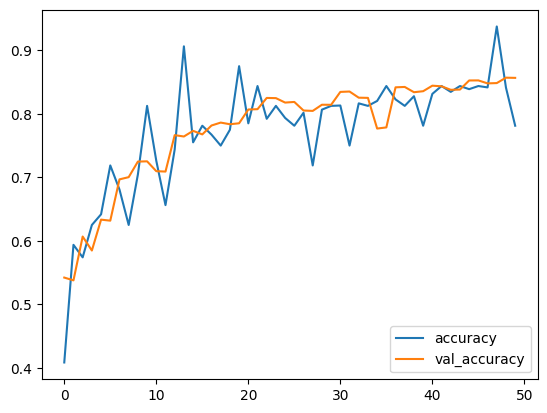

In [59]:
losses = pd.DataFrame(model.history.history)
losses[['accuracy','val_accuracy']].plot()

<Axes: >

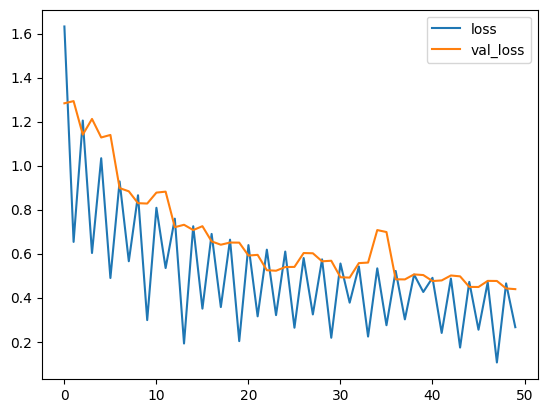

In [60]:
losses[['loss','val_loss']].plot()

In [61]:
from sklearn.metrics import classification_report,confusion_matrix

In [62]:
predictions = np.argmax(model.predict(x_test),axis=1)
print(classification_report(y_test,predictions))

313/313 ━━━━━━━━━━━━━━━━━━━━ 7s 23ms/step
              precision    recall  f1-score   support

           0       0.86      0.89      0.87      1000
           1       0.91      0.97      0.94      1000
           2       0.76      0.82      0.79      1000
           3       0.76      0.68      0.71      1000
           4       0.86      0.83      0.85      1000
           5       0.85      0.73      0.79      1000
           6       0.78      0.95      0.86      1000
           7       0.93      0.88      0.90      1000
           8       0.93      0.93      0.93      1000
           9       0.94      0.90      0.92      1000

    accuracy                           0.86     10000
   macro avg       0.86      0.86      0.86     10000
weighted avg       0.86      0.86      0.86     10000



In [63]:
import seaborn as sns

<Axes: >

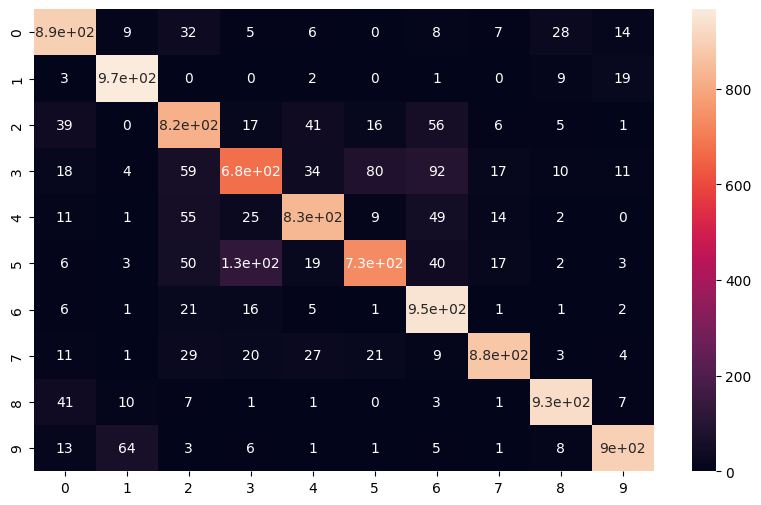

In [64]:
plt.figure(figsize=(10,6))
sns.heatmap(confusion_matrix(y_test,predictions),annot=True)


In [67]:
INPUT_SHAPE = (32, 32, 3)
KERNEL_SIZE = (3, 3)
model = Sequential()

# Convolutional Layer
model.add(Conv2D(filters=32, kernel_size=KERNEL_SIZE, input_shape=INPUT_SHAPE, activation='relu', padding='same'))

model.add(Conv2D(filters=32, kernel_size=KERNEL_SIZE, input_shape=INPUT_SHAPE, activation='relu', padding='same'))

# Pooling layer
model.add(MaxPool2D(pool_size=(2, 2)))
# Dropout layers
model.add(Dropout(0.25))

model.add(Conv2D(filters=64, kernel_size=KERNEL_SIZE, input_shape=INPUT_SHAPE, activation='relu', padding='same'))

model.add(Conv2D(filters=64, kernel_size=KERNEL_SIZE, input_shape=INPUT_SHAPE, activation='relu', padding='same'))

model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(filters=128, kernel_size=KERNEL_SIZE, input_shape=INPUT_SHAPE, activation='relu', padding='same'))

model.add(Conv2D(filters=128, kernel_size=KERNEL_SIZE, input_shape=INPUT_SHAPE, activation='relu', padding='same'))

model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Flatten())
# model.add(Dropout(0.2))
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.25))
model.add(Dense(10, activation='softmax'))

METRICS = [
    'accuracy',
    tf.keras.metrics.Precision(name='precision'),
    tf.keras.metrics.Recall(name='recall')
]
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=METRICS)

C:\Users\Sumit\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


In [69]:
batch_size = 32
data_generator = ImageDataGenerator(width_shift_range=0.1, height_shift_range=0.1, horizontal_flip=True)
train_generator = data_generator.flow(x_train, y_cat_train, batch_size)
steps_per_epoch = x_train.shape[0] // batch_size

r = model.fit(train_generator, 
              epochs=50,
              steps_per_epoch=steps_per_epoch,
              validation_data=(x_test, y_cat_test), 
              callbacks=[early_stop],
              batch_size=batch_size,
             )

Epoch 1/50
1562/1562 ━━━━━━━━━━━━━━━━━━━━ 131s 83ms/step - accuracy: 0.5411 - loss: 1.2699 - precision: 0.7238 - recall: 0.3564 - val_accuracy: 0.6158 - val_loss: 1.1021 - val_precision: 0.7569 - val_recall: 0.4651
Epoch 2/50
1562/1562 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.5938 - loss: 0.4445 - precision: 0.8000 - recall: 0.3750 - val_accuracy: 0.6053 - val_loss: 1.1389 - val_precision: 0.7459 - val_recall: 0.4615
Epoch 3/50
1562/1562 ━━━━━━━━━━━━━━━━━━━━ 130s 83ms/step - accuracy: 0.5931 - loss: 1.1511 - precision: 0.7555 - recall: 0.4315 - val_accuracy: 0.6571 - val_loss: 0.9709 - val_precision: 0.7789 - val_recall: 0.5415
Epoch 4/50
1562/1562 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.6562 - loss: 0.5703 - precision: 0.8095 - recall: 0.5312 - val_accuracy: 0.6558 - val_loss: 0.9719 - val_precision: 0.7817 - val_recall: 0.5408
Epoch 5/50
1562/1562 ━━━━━━━━━━━━━━━━━━━━ 132s 85ms/step - accuracy: 0.6220 - loss: 1.0596 - precision: 0.7694 - recall: 0.4803 - val_accuracy: 0.

In [70]:
model.save('my_model_with_BatchNormalization.keras')

In [71]:
predictions = np.argmax(model.predict(x_test),axis=1)
print(classification_report(y_test,predictions))

313/313 ━━━━━━━━━━━━━━━━━━━━ 6s 20ms/step
              precision    recall  f1-score   support

           0       0.75      0.83      0.79      1000
           1       0.85      0.93      0.89      1000
           2       0.74      0.53      0.62      1000
           3       0.61      0.53      0.57      1000
           4       0.73      0.67      0.70      1000
           5       0.69      0.68      0.68      1000
           6       0.60      0.91      0.73      1000
           7       0.84      0.75      0.79      1000
           8       0.90      0.83      0.86      1000
           9       0.85      0.85      0.85      1000

    accuracy                           0.75     10000
   macro avg       0.76      0.75      0.75     10000
weighted avg       0.76      0.75      0.75     10000



In [73]:
model.fit(x_train,y_cat_train,epochs=50,validation_data=(x_test,y_cat_test),callbacks=[early_stop])

Epoch 1/50
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 128s 80ms/step - accuracy: 0.7456 - loss: 0.7375 - precision: 0.8333 - recall: 0.6605 - val_accuracy: 0.7611 - val_loss: 0.6976 - val_precision: 0.8328 - val_recall: 0.6965
Epoch 2/50
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 124s 80ms/step - accuracy: 0.7613 - loss: 0.6860 - precision: 0.8444 - recall: 0.6864 - val_accuracy: 0.7723 - val_loss: 0.6773 - val_precision: 0.8348 - val_recall: 0.7170
Epoch 3/50
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 135s 75ms/step - accuracy: 0.7753 - loss: 0.6528 - precision: 0.8541 - recall: 0.7044 - val_accuracy: 0.7761 - val_loss: 0.6510 - val_precision: 0.8440 - val_recall: 0.7110
Epoch 4/50
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 127s 82ms/step - accuracy: 0.7785 - loss: 0.6319 - precision: 0.8539 - recall: 0.7111 - val_accuracy: 0.7840 - val_loss: 0.6409 - val_precision: 0.8525 - val_recall: 0.7219
Epoch 5/50
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 118s 76ms/step - accuracy: 0.7821 - loss: 0.6188 - precision: 0.8548 - recall: 0.7186 - val_accura

In [74]:
model.save('my_model_normal.keras')

In [75]:
predictions = np.argmax(model.predict(x_test),axis=1)
print(classification_report(y_test,predictions))

313/313 ━━━━━━━━━━━━━━━━━━━━ 6s 20ms/step
              precision    recall  f1-score   support

           0       0.83      0.78      0.80      1000
           1       0.92      0.85      0.89      1000
           2       0.81      0.62      0.70      1000
           3       0.71      0.51      0.59      1000
           4       0.72      0.80      0.76      1000
           5       0.65      0.79      0.71      1000
           6       0.74      0.90      0.81      1000
           7       0.83      0.83      0.83      1000
           8       0.87      0.87      0.87      1000
           9       0.82      0.90      0.85      1000

    accuracy                           0.78     10000
   macro avg       0.79      0.78      0.78     10000
weighted avg       0.79      0.78      0.78     10000

